In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import pandas as pd

# Filepath for Netflix Dataset from GitHub
FILEPATH = 'https://raw.githubusercontent.com/SreNanthini/VOIS_AICTE_Oct2025_MajorProject_SreNanthini/main/Netflix%20Dataset.csv'

# Read the CSV file
df = pd.read_csv(FILEPATH, encoding='latin-1')

# Print first 15 rows of each column
for k, v in df.items():
    print('df: ' + k)
    print(v.head(15))


df: Show_Id
0      s1
1      s2
2      s3
3      s4
4      s5
5      s6
6      s7
7      s8
8      s9
9     s10
10    s11
11    s12
12    s13
13    s14
14    s15
Name: Show_Id, dtype: object
df: Category
0     TV Show
1       Movie
2       Movie
3       Movie
4       Movie
5     TV Show
6       Movie
7       Movie
8       Movie
9       Movie
10      Movie
11    TV Show
12    TV Show
13      Movie
14      Movie
Name: Category, dtype: object
df: Title
0        3%
1     07:19
2     23:59
3         9
4        21
5        46
6       122
7       187
8       706
9      1920
10     1922
11     1983
12     1994
13    2,215
14     3022
Name: Title, dtype: object
df: Director
0                      NaN
1        Jorge Michel Grau
2             Gilbert Chan
3              Shane Acker
4           Robert Luketic
5              Serdar Akar
6          Yasir Al Yasiri
7           Kevin Reynolds
8            Shravan Kumar
9             Vikram Bhatt
10            Zak Hilditch
11                     NaN
12

In [6]:
display(df.head(2))
display(df.tail(2))
print("Columns:", df.columns)
for col in df.columns:
 print(col)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


Columns: Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')
Show_Id
Category
Title
Director
Cast
Country
Release_Date
Rating
Duration
Type
Description


In [7]:
# Shape
print("No of Rows:", df.shape[0])
print("No of Columns:", df.shape[1])
print("Total Elements:", df.size)


No of Rows: 7789
No of Columns: 11
Total Elements: 85679


In [8]:

# Data Types
print(df.dtypes)

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object


In [11]:
# Convert date_added column to datetime if present
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
print(df.dtypes)


Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object


In [12]:
# Null Values
print(df.isnull().sum())
print("Total null values:", df.isnull().sum().sum())


Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64
Total null values: 3630


In [27]:
# Golden Rule for director column
if 'director' in df.columns:
    percentage_nulls = (df['director'].isnull().sum())/len(df)*100
    print(f"Percentage of Nulls in Director Column: {percentage_nulls:.2f}%")
else:
    print("Column 'director' not found in dataset")

# Fill missing values in rating with mode
if 'rating' in df.columns:
    before_nulls = df['rating'].isnull().sum()
    df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
    after_nulls = df['rating'].isnull().sum()
    print(f"Rating column nulls before: {before_nulls}, after: {after_nulls}")
else:
    print("Column 'rating' not found in dataset")


Column 'director' not found in dataset
Column 'rating' not found in dataset


In [20]:
# Duplicates
duplicates = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicates))
start = len(df)
df.drop_duplicates(inplace=True)
end = len(df)
print("Number of duplicate rows removed:", start - end)

Number of duplicate rows: 2
Number of duplicate rows removed: 2


In [36]:
# Count of Movies vs TV Shows
if 'type' in df.columns:
    sns.countplot(x='type', data=df)
    plt.title('Distribution of Movies vs TV Shows')
    plt.show()

# Top 10 countries producing Netflix content
if 'country' in df.columns:
    top_countries = df['country'].value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_countries.index, y=top_countries.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 Countries by Content Count")
    plt.show()

# Content added over years
if 'date_added' in df.columns:
    plt.figure(figsize=(12,6))
    df['date_added'].dt.year.value_counts().sort_index().plot(kind='bar')
    plt.title("Content Added per Year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.show()

# Top 10 genres (listed_in column)
if 'listed_in' in df.columns:
    genres = df['listed_in'].str.split(',').explode().str.strip()
    top_genres = genres.value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_genres.index, y=top_genres.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 Genres on Netflix")
    plt.show()

# Example filters
if 'type' in df.columns:
    movies_count = df[df['type'] == 'Movie'].shape[0]
    shows_count = df[df['type'] == 'TV Show'].shape[0]
    print("Movies:", movies_count)
    print("TV Shows:", shows_count)

if 'release_year' in df.columns:
    recent_content = df[df['release_year'] > 2015].shape[0]
    print("Content released after 2015:", recent_content)

if 'country' in df.columns:
    india_content = df[df['country'].str.contains('India', na=False)].shape[0]
    print("Indian Content Count:", india_content)


Movies vs TV Shows count:
Type
Documentaries                                                  334
Stand-Up Comedy                                                321
Dramas, International Movies                                   320
Comedies, Dramas, International Movies                         243
Dramas, Independent Movies, International Movies               215
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
Docuseries, Science & Nature TV, TV Action & Adventure           1
British TV Shows, Classic & Cult TV, Kids' TV                    1
Docuseries, TV Sci-Fi & Fantasy                                  1
Children & Family Movies, Dramas, Music & Musicals               1
Name: count, Length: 492, dtype: int64 



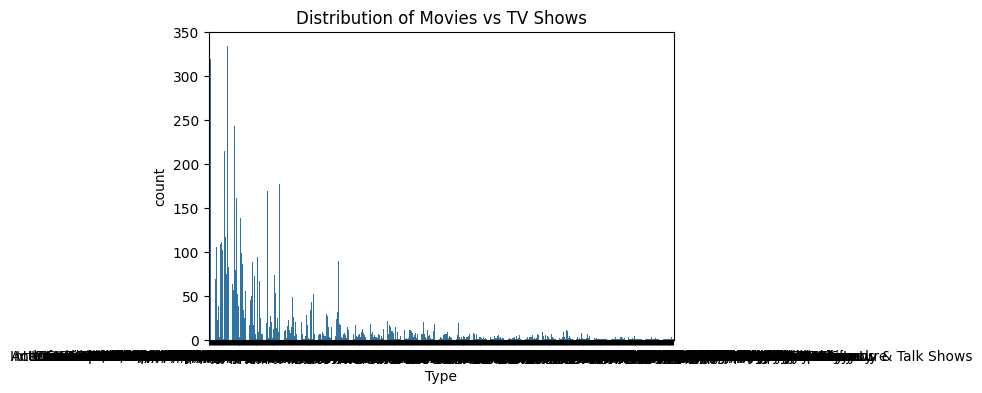

Top 10 countries by content count:
 Country
United States     2556
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: count, dtype: int64 



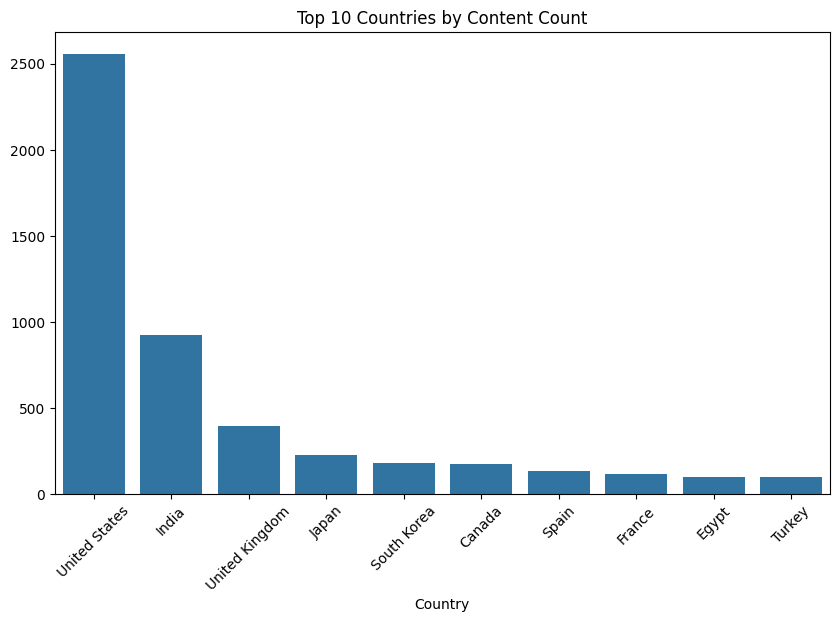

Content added per year:
 Release_Date
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      24
2015.0      79
2016.0     432
2017.0    1201
2018.0    1661
2019.0    2137
2020.0    2009
2021.0     117
Name: count, dtype: int64 



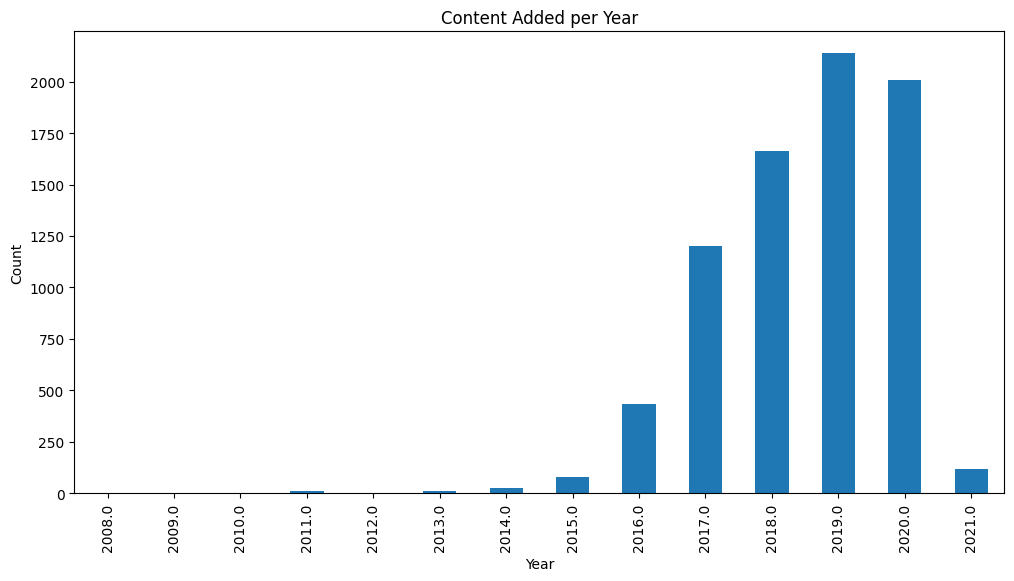

Top 10 Genres on Netflix:
 Category
Movie      5379
TV Show    2410
Name: count, dtype: int64 



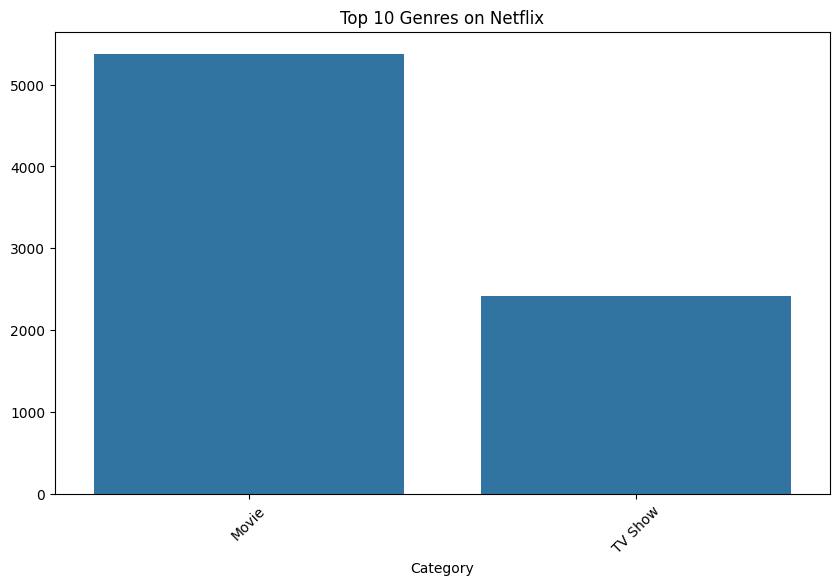

Movies: 0
TV Shows: 0

Content released after 2015: 7557

Indian Content Count: 990



In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
FILEPATH = 'https://raw.githubusercontent.com/SreNanthini/VOIS_AICTE_Oct2025_MajorProject_SreNanthini/main/Netflix%20Dataset.csv'

# Read the CSV file
df = pd.read_csv(FILEPATH, encoding='latin-1')


if 'Type' in df.columns:
    print("Movies vs TV Shows count:")
    print(df['Type'].value_counts(), "\n")

    plt.figure(figsize=(6,4))
    sns.countplot(x='Type', data=df)
    plt.title('Distribution of Movies vs TV Shows')
    plt.show()


if 'Country' in df.columns:
    top_countries = df['Country'].value_counts().head(10)
    print("Top 10 countries by content count:\n", top_countries, "\n")

    plt.figure(figsize=(10,6))
    sns.barplot(x=top_countries.index, y=top_countries.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 Countries by Content Count")
    plt.show()


if 'Release_Date' in df.columns:
    df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
    yearly_content = df['Release_Date'].dt.year.value_counts().sort_index()
    print("Content added per year:\n", yearly_content, "\n")

    plt.figure(figsize=(12,6))
    yearly_content.plot(kind='bar')
    plt.title("Content Added per Year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.show()


if 'Category' in df.columns:
    genres = df['Category'].dropna().str.split(',').explode().str.strip()
    top_genres = genres.value_counts().head(10)
    print("Top 10 Genres on Netflix:\n", top_genres, "\n")

    plt.figure(figsize=(10,6))
    sns.barplot(x=top_genres.index, y=top_genres.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 Genres on Netflix")
    plt.show()


if 'Type' in df.columns:
    movies_count = df[df['Type'] == 'Movie'].shape[0]
    shows_count = df[df['Type'] == 'TV Show'].shape[0]
    print(f"Movies: {movies_count}")
    print(f"TV Shows: {shows_count}\n")

if 'Release_Date' in df.columns:
    recent_content = df[df['Release_Date'].dt.year > 2015].shape[0]
    print(f"Content released after 2015: {recent_content}\n")

if 'Country' in df.columns:
    india_content = df[df['Country'].str.contains('India', na=False)].shape[0]
    print(f"Indian Content Count: {india_content}\n")
